# Chapter 13     
# Introduction to Hypothesis Testing     


## Introduction    

Hypothesis testing is a fundamental process in statistical inference. Hypothesis testing seeks to answer the question, are the differences in the distributions of certain variables **statistically significant**? The concept of statistical significance must not be confused with the question, are differences in the distributions of certain variables important to the problem being addressed? While hypothesis testing helps to identify candidates with important differences, **the method cannot and does not measure importance**.    

An often difficult to grasp concept is that many hypothesis testing methods only measure with respect to a **null hypothesis**. A null hypothesis is the hypothesis that there is no significant difference between the distributions of the variables being considered. The goal of the test is to either **reject a null hypothesis** or **not reject a null hypothesis**. Notice, that this process does not directly consider if the null hypotheisis or any **alternative hypothesis** is true or not. In fact, there may be many alternative hypotheses!  

## Significance Cannot Determine Importance

When performing inference we often speak of **statistical significance**. However, one must never confuse this concept with actual importance. Statistical significance is a statement concerning probability. But, the importance of a relationship to the problem at hand can be an entirely different matter. Early workers in statistical inference recognized this fact. For example, Ronald A. Fisher [-@Fisher_1932] warned:    

"*I believe that no one who is familiar, either with mathematical advances in other fields or with the range of special biological conditions to be considered, would ever conceive that everything could be summed up in a single mathematical formula, however complex.*"    

So what use is statistical significance then? Many statisticians would say that a statistically significant result indicates a relationship that is worthy of further investigation. Further investigation can take many forms. A few examples include:   

- Gather more data, either observational or experimental. 
- Find other variables which might illuminate the relationship under investigation.   
- Consider the theoretical basis of the relationship. Can known science add understanding?  

In summary, do not confuse statistical significance with actual importance. Statistical significance can help identify important relationships but is not evidence of actual importance.     

## Steps for Two-Sample Hypothesis Testing

Let's consider a simple and practical scenario for two sample hypothesis testing. 

1. **Identify a null hypothesis to be tested:** In this example, we want to know if using a larger logo on a website results in significantly different use. Use is measured in terms of number of clicks per session. In this case, the **null hypothesis**, denoted $H_0$, is that the size of the logo does not matter. More formally, this null hypothesis is the population assumption of no difference in use. Users of the web site with the original logo are the **control group**. 
2. The **alternative hypothesis** is usually stated in terms of a **treatment** and denoted $H_a$. In this example, the treatment is a website with a larger logo, and its users are the **treatment group**. And, $H_a$ is the hypothesis that the population of users for the new web site are significantly different from the control.     
3. **Choose a test statistic:** The test statistic is used as the criteria to determine the significance of the test result. For example, the test statistic here could be the differnce in the mean clicks per user session between the two sites.      
4. **Select a criteria to evaluate the hypothesis:** A **significance level** or **cutoff** probability is specified. This cutoff value is the level of **confidence** required to consider that the computed test statistic **does not occur by randomness alone**. The cutoff is selected by how much confidence is required that the population difference is statistically significant. Typical cutoff values include 0.1, 0.05, and 0.01. The choice of cutoff is problem-specific. In this case, if our sample has a probability $<= 10\%$ that randomness alone caused the observed difference we **reject the null hypothesis** that the logo does not mater.
5. **Acquire a random sample from the population:** The population, in this case, is all possible users of the website. Randomly draw a number of users for the **control group** and the **treatment group(s)**.  
6. **Calculate the value of the test statistic** to compare the **responses**. If the test statistic has a value beyond the cutoff we say the differences are **significant** and reject the null hypothesis. 

The foregoing seems like a simple recipe, but there are many pitfalls.   

**Rejecting the null hypothesis does not mean we should accept a particular alternative**. Conversely, failing to reject the null hypothesis can occur for several reasons, including:   
- The alternative hypothesis was false to begin with.
- We did not collect enough evidence given the **size of the effect**. Roughly speaking, the effect size is a difference in populations under the different treatments. We will explore this aspect of the problem in the **power** discussion below.   
  - There can be multiple alternatives. In our example, even in the case we reject the null hypothesis, the number of clicks per session on the new website could be greater or less than the control site.   
  
**Significance simply means the cutoff value has been exceeded, but does not mean the inference is actually important in human terms**. Even if the null hypothesis is rejected, we cannot answer the question of the business impact of the new website actually being important to the company from the hypothesis test alone. 

We will have more to say about these and other complications later. 

## One Sample vs. Two-Sample Tests   

You will often see the terms **one sample test** and **two sample test** used. What does this mean, and why is it important? These concepts can be summarized as follows:        

**One sample test**    
The goal of a one-sample test is to determine if a statistic is significantly different from zero or some other predetermined value. We will encounter this test in several situations. For example, in Chapters 19 and 20 we will use one sample test to determine if coefficients of a regression model are significant.      

**Two sample test**    
As the name implies, two sample hypothesis tests test the significance of the difference between samples from two populations. As has already been discussed, one population is generally called the control group, and the other population is known as the treatment group. For the time being, we will focus on two-sample tests.   

To proceed with the exercises, execute the code in the cell below to import the required packages.    

In [1]:
from scipy.stats import norm
import numpy as np
import numpy.random as nr
import pandas as pd
from statistics import mean
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import statsmodels.stats.power as smsp
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing and the Cut-Off   

To reiterate, the primary idea of a statistical test is determining if the value of the chosen **test statistic** exceeds a cutoff value. We select the cutoff value based on the **confidence** we wish to have in the test result. In other words, the **cutoff is the probability the test statistic exceeds that value by from random variation alone**. For example, by specifying a cutoff of $0.05$ we are saying that the probability that the test statistic, computed from the null distribution, exceeds the cutoff is $0.05$. Once the cutoff value has been set and the test statistic computed, we interpret the results as follows:         
- If the test statistic does not exceed the cutoff value, we **fail to reject the null hypothesis**.   
- On the other hand, if the test statistic exceeds the cutoff we **reject the null hypothesis**. 

The foregoing seems straightforward enough. But, there is one other significant consideration. Which tails of the distribution of the test statistic do we consider? The choice depends on the nature of the alternative hypothesis being tested. For a cutoff value, $\alpha$, are three possible choices:   
1. **Two-sided:** In this case, we test the computed value of the test statistic is significantly different than the null hypothesis. The difference can be positive or negative. Cutoff values of $[\alpha/2, 1.0 - \alpha/2]$ are used on the lower and upper tails of the test statistic distribution. The null hypothesis can be rejected when the test statistic, $u < \alpha$ or $u > 1 - \alpha$.         
2. **One-sided upper tail:** In this case, the null hypothesis is that the test statistic is greater than the cutoff value $1.0 - \alpha$. The cutoff is applied only to the upper tail of the test statistic distribution. In this case one can reject the null hypothesis when the computed test statistic is greater than the cutoffl value.      
3. **One-sided lower tail:** Finally, we have the case where the null hypothesis is that the test statistic is less than the cutoff value $\alpha$. The cutoff is applied only to the lower  tail of the test statistic distribution. In this case one can reject the null hypothesis when the computed test statistic is less than the cutoff value.      

You can illustrate these cases by executing the code in the cell below and examining the resulting plots.  

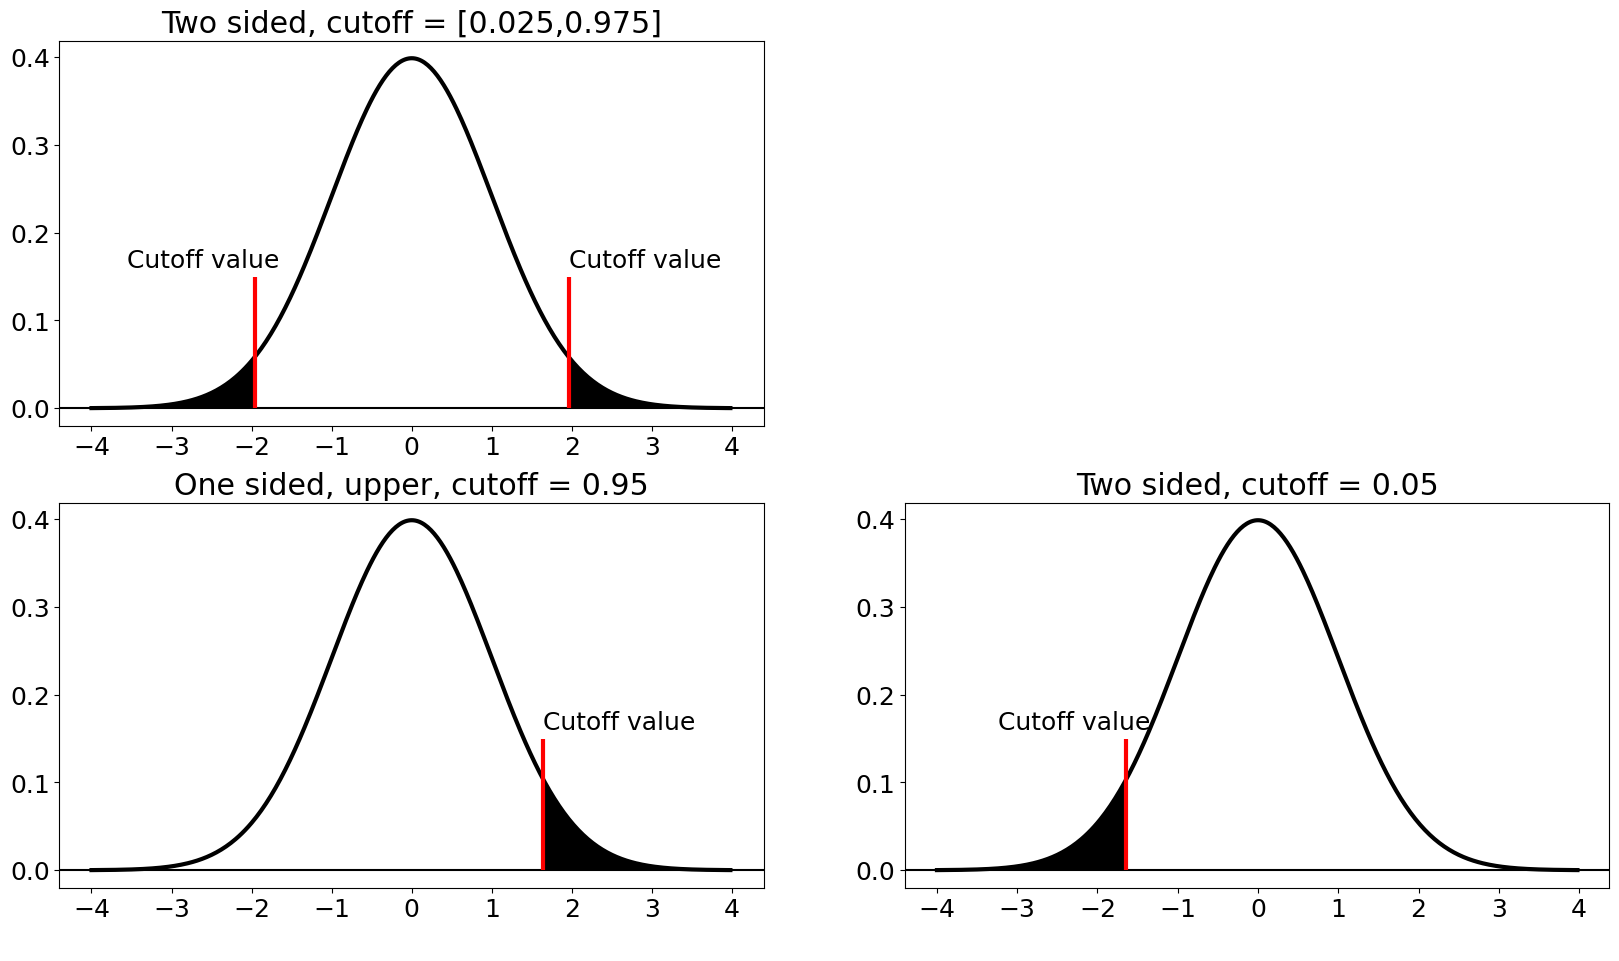

In [2]:
## figure1 showing cutoff 
def cutoff_polygon(upper, cutoff, ax, step=0.02):
    ## Plot the cuttoff area 
    lower = norm.ppf(cutoff)
    if(lower > upper):
        ax.vlines(lower, 0.0, 0.15, color='red', linewidth=3)
        ax.text(lower-1.6, 0.16, 'Cutoff value')
        temp = upper
        upper = lower
        lower = temp  
    else:
        ax.vlines(lower, 0.0, 0.15, color='red', linewidth=3)
        ax.text(lower, 0.16, 'Cutoff value')
    x = list(np.arange(lower, upper, step))
    norm_vals = list(np.apply_along_axis(lambda x: norm.pdf(x), 0, x))
    x = x + [upper, lower]   
    norm_vals = norm_vals + [0.0, 0.0]
    ax.fill(x, norm_vals, 'black')
    
def plot_norm(start, end, ax, title, step=0.2):
    ## Plot the Normal distribution 
    x = np.arange(start, end, step=0.02)
    norm_value = np.apply_along_axis(lambda x: norm.pdf(x), 0, x)
    ax.plot(x, norm_value, linewidth=3, color='black')
    ax.set_title(title)
    ax.set_xlabel(' ')
    ax.axhline(0.0, color='black')

## Set up the plot grid
plt.rc('font', size=18)
fig, ax = plt.subplots(2, 2, figsize=(20, 11)) 
alpha = 0.05

## Two sided
plot_norm(-4.0, 4.0, ax[0,0], title='Two sided, cutoff = [' + str(alpha/2.0) + ',' + str(1.0 - alpha/2.0) + ']')
cutoff_polygon(4.0, 1.0- alpha/2.0, ax[0,0])
cutoff_polygon(-4.0, alpha/2.0, ax[0,0])
ax[0,1].axis('off')

## Upper
plot_norm(-4.0, 4.0, ax[1,0], title='One sided, upper, cutoff = ' + str(1.0 - alpha))
cutoff_polygon(4.0, 1.0- alpha, ax[1,0])

## Lower
plot_norm(-4.0, 4.0, ax[1,1], title='Two sided, cutoff = ' + str(alpha))
cutoff_polygon(-4.0, alpha, ax[1,1])

plt.show()


## What is  the p-value?
Results of hypothesis tests are often reported as a **p-value**. The **p-value is the probability of obtaining a statistic value from the null distribution at least as extreme as the one computed**. For example, for a vaccine study with a p-value of 0.04, you’d obtain the observed difference or more in 4% of studies due to random sampling error. The p-value must be strictly interpreted in terms of this definition.     

The foregoing might seem rather abstract. You must therefore be careful to correctly interpret the p-value. In summary, we can characterize the p-value as follows:    

- **P values address only one question: how likely are your data, assuming a true null hypothesis?** 
- **P value does not measure support for the alternative hypothesis!**
   * For example, the p-value of 0.04 does not mean there is a 0.96 probability that the effect of the new vaccine is significantly different. 
   * A smaller p-value does not mean a result is 'more significance'.
- **Significance** of the test is determined by the p-value. The p-value is a binary decision variable. If the p-value excees the cutoff, the effect is considered significant. 
* **Beware!:** Statistical significance is not a measure of actual importance. Significance only means that there is a reasonable probability the null hypothesis should be rejected. Further investigation, applying **domain knowledge**, is required to determine if the difference is actually important.  




### Common mistakes with P-Values

There are many ways to misinterpret or misuse p-values. Perhaps, the most common errors are these:

1. Interpreting a P value as the probability of mistakenly rejecting a true null hypothesis (a **type I error**).
  - P values calculations assume the null hypothesis is true for the population and the difference means is due to sampling. **P values can not tell you the probability that the null is true or false!** 
  - For the vaccine study, correct and incorrect ways to interpret a P value of 0.04 include:
    * Correct: If the vaccine has no effect,  **the observed difference or more arises solely from random sampling in 4% of studies.**
    * Incorrect: By rejecting the null hypothesis, there is a 4% chance of Type 1 error.
2. Another common mistake: you can deduce the probability that the alternative hypothesis is correct (e.g. $1.0 - p$, or a **type II error**).  

## Hypothesis Tests for Means - the t-test    

As you might expect from the name, the t-test is based on tests on a t-distribution. It turns out that the difference in means between two Normal distributions follows a t-distribution. The t-distribution has many nice properties including:

- The t-distribution is the natural distribution for tests on differences of means. 
- The t-distribution has heavier tails than the Normal and relaxes assumptions on the differences.
- For high degrees of freedom, the t-distribution converges to a Normal distribution, by the Central Limit Theorem. 

### Who was Student?

The basic form of the test is referred to as the Student t-test. The student was a pseudonym for William Sealy Gosset. Gosset worked for the Guinness Company and performed experiments to improve brewing. 

Gosset published the theory of the t-test in 1908 under his pseudonym, 'Student'. There is an apocryphal story that Gosset used a pseudonym since the Guinness company forbade employees from publishing research. However, recently this story has been disproven, as the Guinness company never had such a rule. More likely, Gosset used this pseudonym since he considered himself a student of his mentor, Carl Pearson.      

<img src="../images/Gosset_1908.jpg" alt="Drawing" style="width:300px; height:400px"/>
<center>William Sealy Gosset in 1908</center>

<img src="../images/gossett.jpg" alt="Drawing" style="width:500px; height:250px"/>
<center>Plaque at site of Gosset's home</center>


### Why the t-distribution?

As you might expect from the name, the t-test is based on tests on a t-distribution. It turns out that the difference in means between two Normal distributions follows a t-distribution. The t-distribution was introduced in Chapter 7. The t-distribution has many nice properties including:

- The t-distribution is the natural distribution for tests on differences of means. 
- The t-distribution has heavier tails than the Normal and relaxes assumptions on the differences.
- For high degrees of freedom, the t-distribution converges to a Normal distribution, by the Central Limit Theorem. 

The general form of the t-distribution for the difference of means for two variables, $x_1$ and $x_2$, with sample sizes $n_1$ and $n_2$, can be written:  

$$T_{value} = \frac{\bar{x}_1 - \bar{x}_2}{\Big[ \frac{var(x_1)}{n_1} + \frac{var(x_2)}{n_2}\Big]^{1/2}}$$

And with degrees of freedom:     

$$T_{DoF} = \frac{ \Big[ \frac{var(x_1)^2 }{n_1} + \frac{ var(x_2)^2 }{n_1} \Big]^2}{\frac{ \Big( \frac{  var(x_1)^2 }{n_1} \Big)^2} {n_1-1} + \frac{\big(  \frac{  var(x_2)^2 }{n_2} \Big)^2 } {n_2-1}} $$

At first glance, these appear to be intimidating relationships. The complexity is required to adjust for different variances of the samples and different sample sizes.     

###  A first t-test example

As a first example, compare the means of two Normal distributions. Execute the code in the cell below to compute samples from two Normal distributions with slightly different means.

In [3]:
np.random.seed(seed=233423)
pop_A = norm.rvs(loc=150, scale=7, size=25)
pop_B = norm.rvs(loc=153, scale=4, size=35)

The code in the cell below creates histograms of the two populations along with a line for the mean of each population. Execute this code and examine the results.

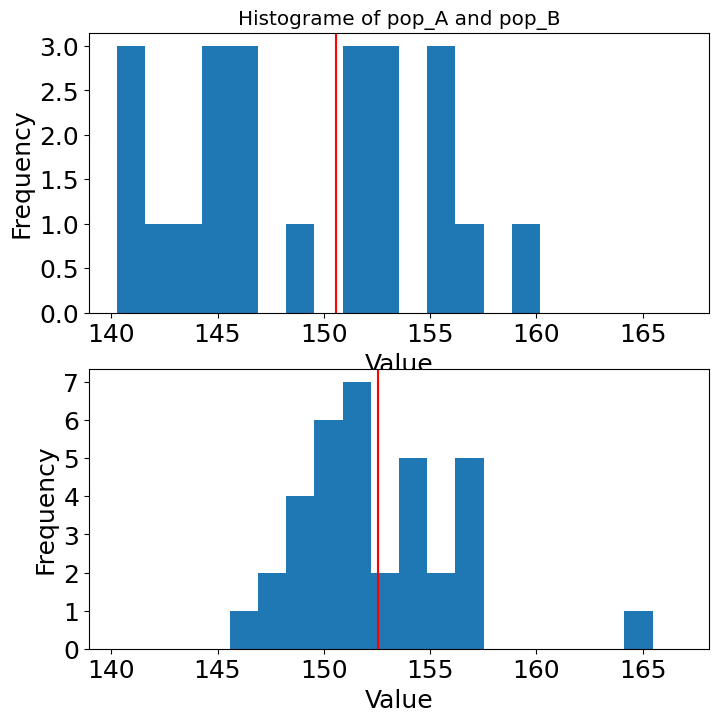

In [4]:
def hist_plot(vec, bins, ax):
    plt.rc('font', size=12)
    ax.hist(vec, bins = bins)
    ax.axvline(mean(vec), color = 'red')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    fig, ax = plt.subplots(2,1, figsize=(8,8))
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    hist_plot(a, bins, ax[0])
    ax[0].set_title('Histogram of ' + cols[0] + ' and ' + cols[1])
    hist_plot(b, bins, ax[1])

plot_pop(pop_A, pop_B)    

You can now compute the two-sided t-test to determine if the difference of means is significant. A number of summary statistics are computed and printed for the test. The two-sided t-test is used to determine if we can reject the null hypothesis that the difference of means is not significant. 

In this case, we know we cannot assume equal variance of the two populations. Therefore, we use Welch's t-test. Computing a t-test including the usual summary statistics with [statsmodels.stats.weightstats.ttest_ind](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html), requires several steps. You can display the t-statistic and other results by executing the code in the cell below.

In [5]:
def t_test(a, b, alpha, alternative='two-sided', usevar = 'unequal'):
    '''Function to compute a two sample t-test on means'''
    
    ## Compute the difference in means for reporting.
    diff = a.mean() - b.mean()

    ## Compute the t-test
    t, p, df = ws.ttest_ind(a, b, usevar=usevar)
    
    ## Find the confidence interval
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar=usevar) 

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([df, diff, t, p, confint[0], confint[1]], index = index)  
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom    32.527186
Difference    -1.975956
Statistic     -1.226974
PValue         0.228639
Low95CI       -5.254211
High95CI       1.302298
dtype: float64

Examine these statistics noticing the following:
1. The **degrees of freedom** determine the shape of the t-distribution used for the test.
2. **Difference in means** is small.
3. **t-statistic is small and the p-value is large**. We cannot reject the null hypothesis. 
4. The **95% confidence interval straddles 0**, indicating that a 0, or null, difference in means is within the CI.  

Based on the above statistics we **cannot reject the null hypothesis**. As we have already said, this does not mean we accept the null hypothesis. 

The code in the cell below makes a similar plot to the ones you have already created, but with the upper and lower confidence bounds shown as dashed lines. Execute this code and examine the results. 

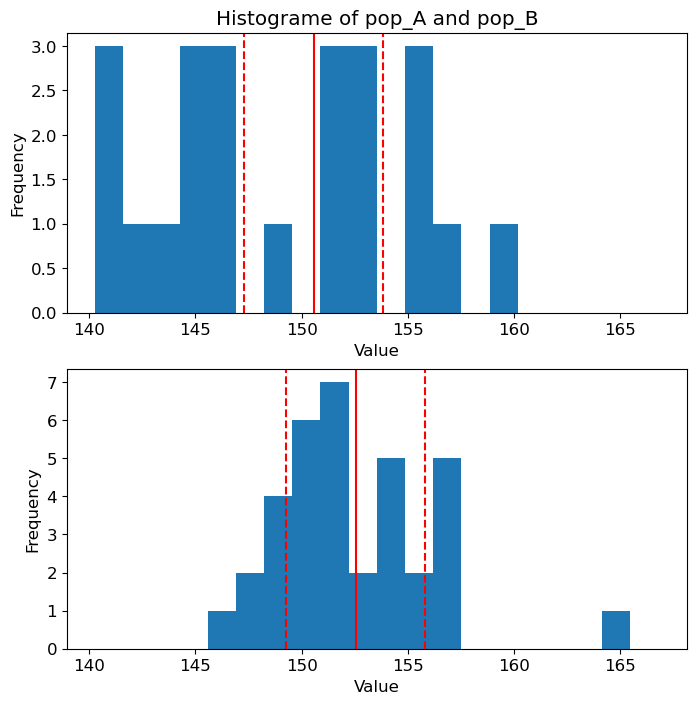

In [6]:
def hist_mean_ci(vec, t_test, bins, ax):
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    ax.hist(vec, bins = bins)
    ax.axvline(mean(vec), color = 'red')
    ax.axvline(upper, color = 'red', linestyle='--')
    ax.axvline(lower, color = 'red', linestyle='--')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    fig, ax = plt.subplots(2,1, figsize=(8,8))
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    hist_mean_ci(a, t_test, bins, ax[0])
    ax[0].set_title('Histogram of ' + cols[0] + ' and ' + cols[1])
    hist_mean_ci(b, t_test, bins, ax[1])
    
plot_t(pop_A, pop_B, test)    

Notice that the mean of the population shown in the lower plot is within the confidence interval of the mean of the population in the upper plot and vice versa. But, the question remains, Is the difference of means of these two populations significant? 

> **Exercise 13-1:** In the previous example the difference of means was not significant. Now, you will repeat this analysis but with a slightly greater difference in means. Create two populations of sizes `25` and `35`, means (`loc`) of `150` and `156` respectively, and scales of `7` and `4` respectively, and a random seed of 357. Determine if this difference in means is significant using the `t_test` and `plot_t` functions.  

DegFreedom    34.231140
Difference    -4.338326
Statistic     -2.658223
PValue         0.011857
Low95CI       -7.654205
High95CI      -1.022447
dtype: float64


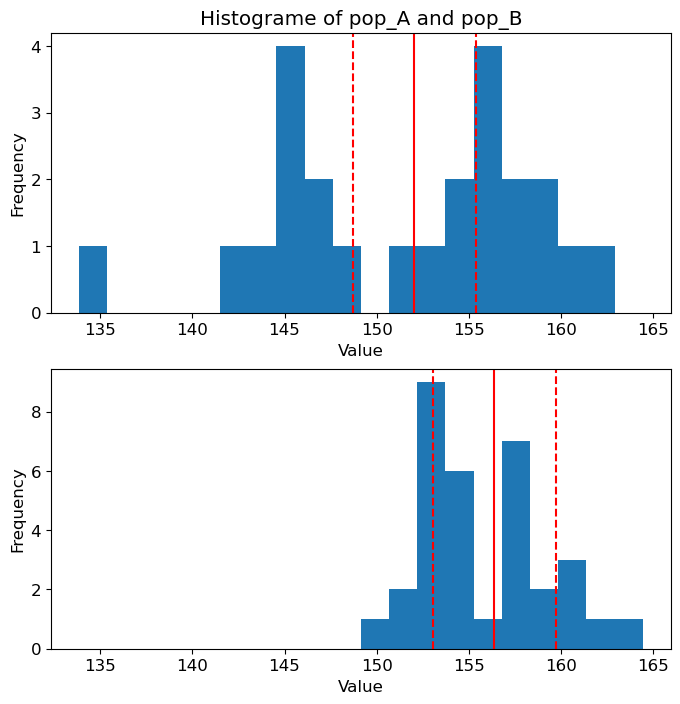

In [11]:
nr.seed(357)
## Put your code below








> Using a cut-off value of 0.05, based on the results of your test, is the difference of means of these distributions significant and why?    

> **Answer:**           

## Power of Tests

The **power of a test** is formally defined as:

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$

In plain language, the **power is the probability of getting a positive result when the null hypothesis is not true**. Conversely, a test with **insufficient power may not detect a real effect**. Clearly, we want the most powerful test we can find for the situation. A powerful test gives a better chance of detecting a significant effect. 

Computing test power can be a bit complex, and analytical solutions can be difficult or impossible to derive. Instead, a simulation is often used to compute power. 

Let's look at the example of computing power for the two-sample t-test for the difference of means. The power of this test depends on the several parameters:   

- The type of test.  
- The number of samples.   
- The anticipated difference in the population means, which we call the **effect size**.   
- The significance level of  the test.   

When running a power test, you can ask several questions, which will assist you in designing an experiment:   
1. Most typically, you will determine how big a sample is required to have a good chance of rejecting the null hypothesis given the expected effect size at the required confidence level. 
  * Traditionally, a power level of 0.8 is considered adequate. However, at this power level there is a 1 in 5 chance of not detecting the desired effect.  
  * One should carefully consider the power level required for the situation at hand.
2. Or, you can also determine how big an effect needs to be, given a fixed sample size (all the samples you have or can afford), for a good chance of rejecting the null hypothesis.  
3. Finally, you can determine how different cutoff values change the likelihood of finding an effect.   

The Python stats models package provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the power of t-tests under various assumptions. 

The code in the cell below does the following:

- Create a sequence of effect sizes.
- Compute a vector of power values for the effect size using [statsmodels.stats.power.tt_ind_solve_power](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html).
- Plot the effect size vs. power. 

Execute this code and examine the result. 

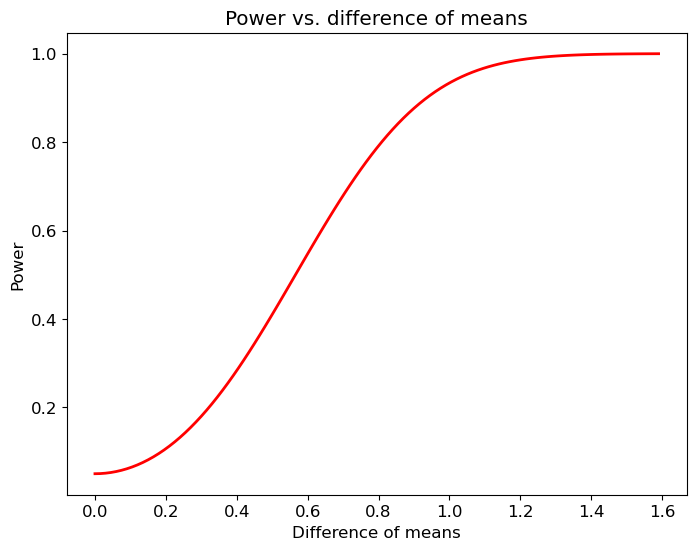

In [8]:
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 1.6, step = .015)
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 25, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    fig,ax = plt.subplots(figsize=(8,6))
    ax.plot(x, y, color = 'red', linewidth = 2)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

Examine these results and notice how the power of the t-test rapidly increases as the difference in means increases. Past a difference of means of 1.0 the power of the test is approaching 1.0, the maximum possible. 

> **Exercise 13-2:** One can also determine the effect of changing the cut-off value, $\alpha$, on the power of a test. In the code cell below, compute and plot 100 values of test power for significance levels in the range $\{0.001, 0.25\}$ in steps of $0.0025$. Set `n = 25`, `d = 1.0`, the effect size, for the number of samples and the difference in means.

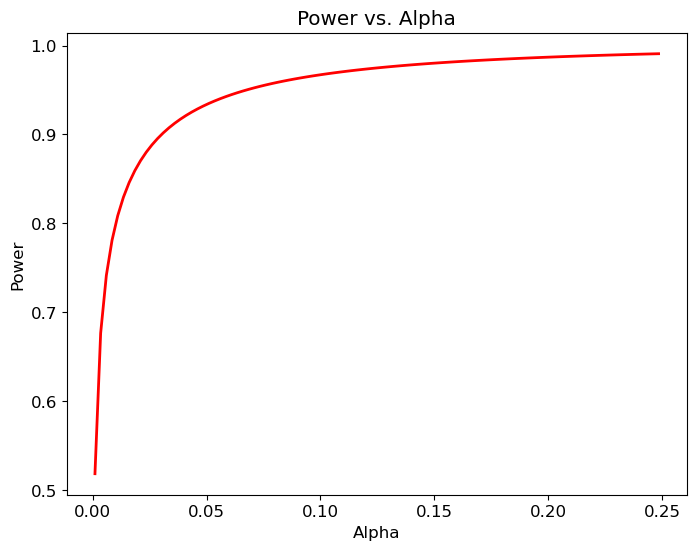

In [9]:
## Put your code below






> For a cut-off value of 0.05 is the probability of a Type 2 error less that 0.9 and why?

> **Answer:**     

> **Exercise 13-3:** The third factor one can examine when examining test power is the sample size. In the cell below, compute and plot 100 values of test power for sample size in the range $[2, 100]$ in step 1. Set `d = 1.0`, the effect size, and `sig.level = 0.05`, for the difference in means and the significance level.

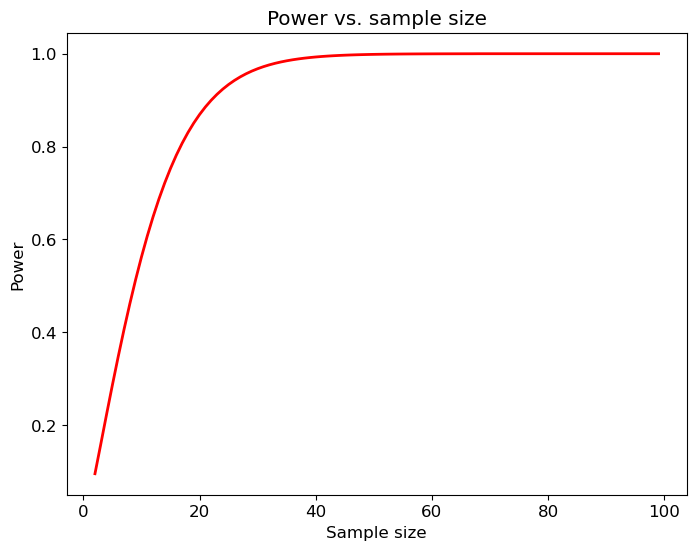

In [12]:
## Put your code below





> What is the approximate minimum sample size required to achieve a Type 2 error probability of less than 0.05 and why?  

> **Answer:**     

#### Copyright 2018, 2019, 2020, 2021, 2022, 2023 Stephen F Elston. All rights reserved.   